In [27]:
# Calculating the profits of an organisation based on the investment on various departments(R&D,marketing,etc...)
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Loading the dataset
dataset=pd.read_csv('50_Startups.csv')
print(dataset.head(5))

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [29]:
# Descriptive Shape of the dataset
print("dataset shape",dataset.shape)
# desctiptive datatype of each attribute
print("Attribute Datatype",dataset.dtypes)

('dataset shape', (50, 5))
('Attribute Datatype', R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object)


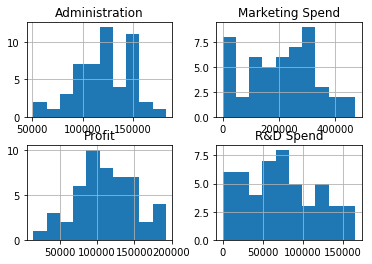

In [30]:
# Data Visualization of each attribute

# Histogram Graph Visualization for each attribute
dataset.hist()
plt.show()

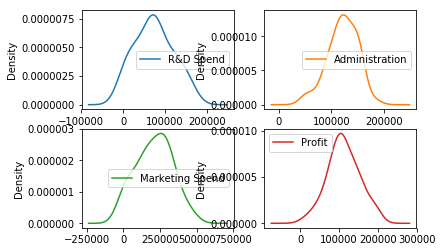

In [31]:
# Density Visualization for each attribute
dataset.plot(kind='density',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

In [37]:
# Split Dataset into input and output attribute
array=dataset.values
x=array[:,:-1]
y=array[:,-1]
print("------------------- x Input Attribute--------------")
print(x[:5,:])
print("--------------------y Output Attribute-------------")
print(y[:5,])

------------------- x Input Attribute--------------
[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]
--------------------y Output Attribute-------------
[192261.83 191792.06 191050.39 182901.99 166187.94]


In [38]:
# Applying Label Encoding to convert categorical value into numerical value using Label Encoder function
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
x[:,3]=labelencoder.fit_transform(x[:,3])
print(x[:5,:])

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 1]]


In [39]:
# Converting Numerical Values into binary values using One Hot Encoder function
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(categorical_features = [3])
x=onehotencoder.fit_transform(x).toarray()
print(x[:5,:])

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]]


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [40]:
# Handling Dummy variable trap by removing one binary atrribute create in One Hot Encoder
x=x[:,1:]
print(x[:3,:])

[[0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05]
 [0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05 4.4389853e+05]
 [1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05 4.0793454e+05]]


In [43]:
# Evaluate performance of an algorithm using resamlpe method
# Splitting dataset into training and test set
seed=5
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=seed)

In [44]:
# Rescaling Standard Scaler range from 0 to 1
from sklearn.preprocessing import StandardScaler
std_x=StandardScaler()
std_x.fit(x_train)
x_train=std_x.transform(x_train)
x_test=std_x.transform(x_test)

In [45]:
# Evaluate Performance of an algorithms through metrics
from math import sqrt
def root_mean_square_error(actual,predicted):
    sum_error=0.0
    for i in range(len(actual)):
        yhat=predicted[i]-actual[i]
        sum_error+=(yhat **2)
    rmse=sum_error/float(len(actual))
    return sqrt(rmse)

In [48]:
# Multiple Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
# Predicting the Algorithm
y_pred=regression.predict(x_test)
print(y_pred)
print("mean predict accracy",y_pred.mean())

[ 71126.07646015  99884.57366953 155529.85660165 111888.61940958
 100729.2574038  129237.33883574 180769.04929609  58721.67046003
 172004.5670555  117163.93253105]
('mean predict accracy', 119705.49417231258)


In [ ]:
# Cant Visualizaling 2D for more attributes 

In [55]:
# Accuracy of an algorithm
accuracy=root_mean_square_error(y_test,regression.predict(x_test))
print("Accuracy of an Algorithm",accuracy)

('Accuracy of an Algorithm', 7226.931004449552)
